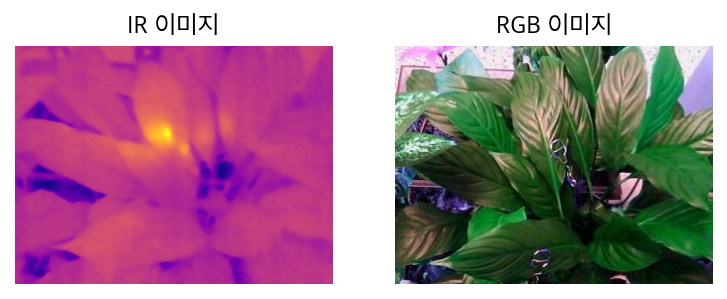

In [1]:
import common
import cv2
import matplotlib.pyplot as plt

ir_image = common.load_ir_in_csv('./plant-ir/121.csv')
rgb_image = cv2.imread('./plant-rgb/FLIR0121- 사진.jpg')

WIDTH = 320
HEIGHT = 240

fig, axs = plt.subplots(1, 2)
fig.dpi = 150
axs[0].imshow(ir_image, cmap='plasma')
axs[0].axis(False)
axs[0].set_title('IR 이미지')
axs[1].imshow(rgb_image)
axs[1].axis(False)
axs[1].set_title('RGB 이미지')
plt.show()

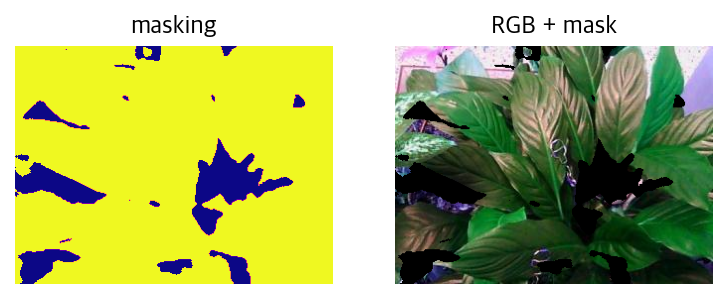

In [2]:
from jenkspy import jenks_breaks
import numpy as np

ir_breaks = jenks_breaks(ir_image.ravel(), nb_class=2)

mask = np.zeros(shape=(HEIGHT, WIDTH), dtype=np.uint8)
for row, col in np.ndindex(ir_image.shape):
    mask[row, col] = 0xFF if ir_breaks[1] < ir_image[row, col] else 0

# plt.imshow(ir_region)
# plt.show()

# plt.imshow(cv2.bitwise_and(cv2.cvtColor(ir_region, cv2.COLOR_GRAY2BGR), rgb_image))
# plt.show()

fig, axs = plt.subplots(1, 2)
fig.dpi = 150
axs[0].imshow(mask, cmap='plasma')
axs[0].axis(False)
axs[0].set_title('masking')
axs[1].imshow(cv2.bitwise_and(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), rgb_image))
axs[1].axis(False)
axs[1].set_title('RGB + mask')
plt.show()


In [3]:
max_temperature = np.max(ir_image[mask == 0xFF])
min_temperature = np.min(ir_image[mask == 0xFF])

print('온도 최대값:', max_temperature)
print('온도 최소값:', min_temperature)
print('온도 평균값:', common.get_average_tempeature(ir_image, mask))

온도 최대값: 28.469
온도 최소값: 25.324
온도 평균값: 25.80181457479012
